# Problem 1: EU Cities Temperatures Dataset (55 points)
Given a CSV data file as represented by the sample file EuCitiesTemperatures.csv (213 records), load it into a Pandas DataFrame and perform the following tasks on it.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load the CSV file
df = pd.read_csv('EuCitiesTemperatures.csv')

## Preprocessing/Analysis (28 pts)

1. [9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [10]:
# Calculate the mean latitude and longitude for each country, excluding NaN values
mean_lat_lon = df.groupby('country')[['latitude', 'longitude']].mean().round(2)

# Function to fill missing values with the mean of their country
def fill_missing_values(row, column_name):
    if pd.isnull(row[column_name]):
        return mean_lat_lon.loc[row['country'], column_name]
    else:
        return row[column_name]
    
# Fill missing Latitude and Longitude values
df['latitude'] = df.apply(lambda row: fill_missing_values(row, 'latitude'), axis=1)
df['longitude'] = df.apply(lambda row: fill_missing_values(row, 'longitude'), axis=1)

2. [9 pts] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [11]:
# Filter cities by latitude and longitude
filtered_cities = df[(df['latitude'] >= 40) & (df['latitude'] <= 60) &
                     (df['longitude'] >= 15) & (df['longitude'] <= 30)]

# Group by country and count cities
cities_per_country = filtered_cities.groupby('country').size()

# Find the maximum number of cities
max_cities = cities_per_country.max()

# Find countries with the maximum number of cities in the geographical band
countries_with_max_cities = cities_per_country[cities_per_country == max_cities].index.tolist()

# Display the result
print("Countries with the maximum number of cities in the geographical band (lat: [40-60], lon: [15-30]):")
print(countries_with_max_cities)

Countries with the maximum number of cities in the geographical band (lat: [40-60], lon: [15-30]):
['Poland', 'Romania']


3. [10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).

In [18]:
# Identify Region Type
df['region_type'] = df['EU'] + '_' + df['coastline']

# Calculate Average Temperatures for each Region Type
average_temps = df.groupby('region_type')['temperature'].mean().round(2)

# Function to fill missing temperatures
def fill_missing_temperatures(row):
    if pd.isnull(row['temperature']):
        return average_temps[row['region_type']]
    else:
        return row['temperature']

# Fill Missing Temperatures
df['temperature'] = df.apply(fill_missing_temperatures, axis=1)

## Visualization (27 pts)
### For all plots, make sure to label the axes, and set appropriate tick labels.

1. [6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

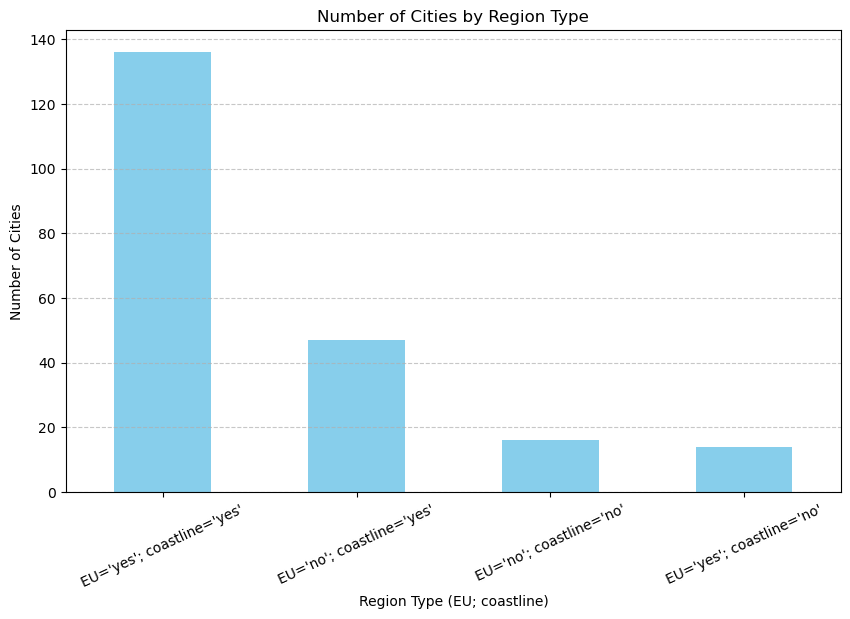

In [38]:
# Replace values in the 'region_type' column
df['region_type'] = df['region_type'].replace({
    'yes_yes': "EU='yes'; coastline='yes'",
    'yes_no': "EU='yes'; coastline='no'",
    'no_yes': "EU='no'; coastline='yes'",
    'no_no': "EU='no'; coastline='no'"
})

# Count the number of cities in each modified Region Type
city_counts = df['region_type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
city_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Cities by Region Type')
plt.xlabel('Region Type (EU; coastline)')
plt.ylabel('Number of Cities')
plt.xticks(rotation=25)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Reset values in the 'region_type' column
df['region_type'] = df['region_type'].replace({
    "EU='yes'; coastline='yes'":'yes_yes',
    "EU='yes'; coastline='no'":'yes_no',
    "EU='no'; coastline='yes'":'no_yes',
    "EU='no'; coastline='no'":'no_no'
})

2. [7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

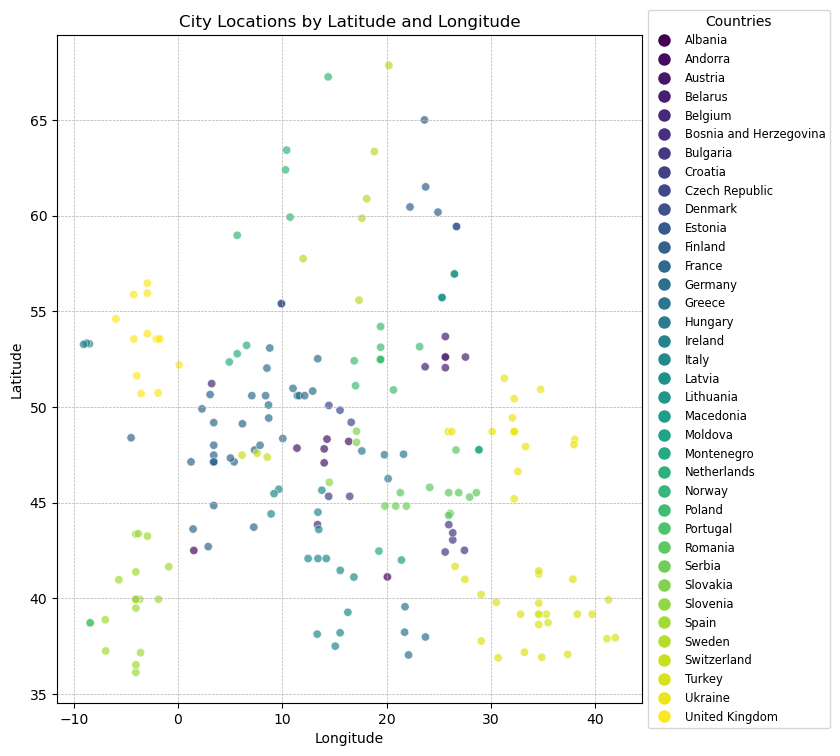

In [31]:
# Create a unique numeric identifier for each country
countries = df['country'].unique()
country_ids = {country: idx for idx, country in enumerate(countries)}
df['CountryID'] = df['country'].apply(lambda x: country_ids[x])


# Create a subplot
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size as needed

# Scatter plot
scatter = ax.scatter(df['longitude'], df['latitude'], c=df['CountryID'], cmap='viridis', alpha=0.7, edgecolors='w', linewidths=0.5)

# Create a legend
# Generate a color for each country based on its CountryID and create a custom legend
unique_countries = df[['CountryID', 'country']].drop_duplicates().sort_values('CountryID')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(country_id)), markersize=10, markeredgecolor='w') for country_id in unique_countries['CountryID']]
legend = ax.legend(handles, unique_countries['country'], loc='center left', bbox_to_anchor=(1, 0.5), title="Countries", fontsize='small')

# Setting titles and labels
ax.set_title('City Locations by Latitude and Longitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout to prevent overlap of the legend with the plot
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

3. [6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

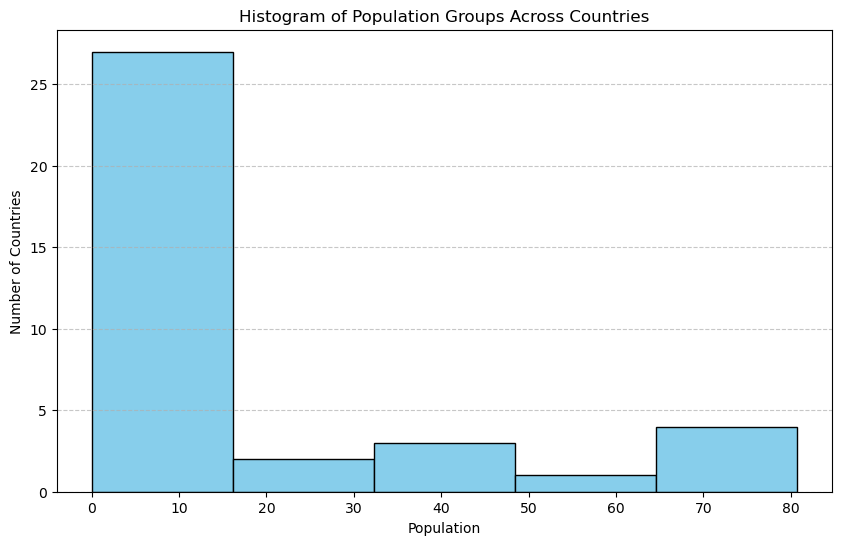

In [15]:
# Drop duplicate countries, keeping the first occurrence
unique_countries = df.drop_duplicates(subset='country')

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(unique_countries['population'], bins=5, color='skyblue', edgecolor='black')

plt.title('Histogram of Population Groups Across Countries')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4. [8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.

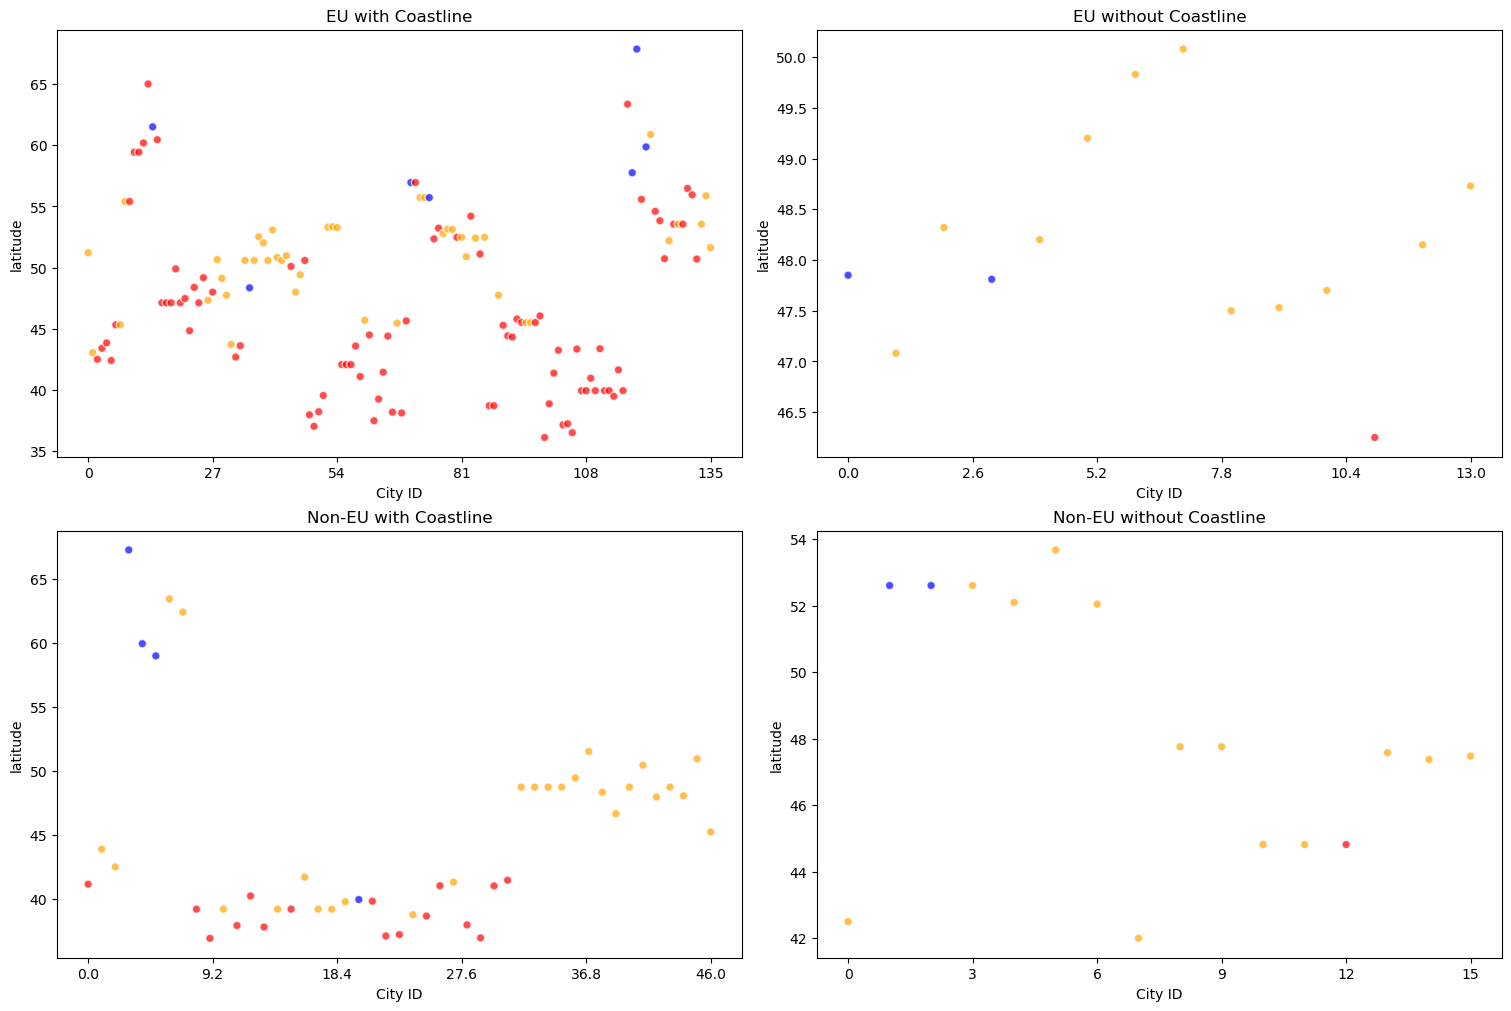

In [39]:
# Map for more descriptive region type labels
region_labels = {
    'yes_yes': 'EU with Coastline',
    'yes_no': 'EU without Coastline',
    'no_yes': 'Non-EU with Coastline',
    'no_no': 'Non-EU without Coastline'
}

# Update region type labels in the DataFrame
df['Region_Type_Label'] = df['region_type'].map(region_labels)

# Set up the matplotlib figure and axes for a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Function to map temperature to color
def temp_to_color(temp):
    if temp > 10:
        return 'red'
    elif temp < 6:
        return 'blue'
    else:
        return 'orange'

for i, (region_type, label) in enumerate(region_labels.items()):
    # Filter the DataFrame for the current region type
    region_df = df[df['region_type'] == region_type].copy()

    # Assign a numeric ID to each city within the region type
    region_df['CityID'] = np.arange(len(region_df))

    # Apply the function to map temperatures to colors
    colors = region_df['temperature'].apply(temp_to_color)

    # Scatter plot: Latitude vs. numeric city ID, colored by temperature
    axes[i].scatter(region_df['CityID'], region_df['latitude'], c=colors, alpha=0.7, edgecolors='w')

    # Customizing the subplot
    axes[i].set_title(label)
    axes[i].set_xlabel('City ID')
    axes[i].set_ylabel('latitude')
    axes[i].set_xticks(np.linspace(0, len(region_df) - 1, min(len(region_df), 6)))  # Limit x-ticks to make it neater

# Adjust layout to prevent overlap and ensure neater presentation
plt.show()